In [2]:
from sklearn import metrics
from math import sqrt
import pandas as pd
data_list=[]
data_list.append(pd.read_csv('./MLP_label.csv'))
data_list.append(pd.read_csv('./MAML_label.csv'))
data_list.append(pd.read_csv('./MAML_ood_label.csv'))
data_list.append(pd.read_csv('./MLP_ood_label.csv'))
result_list=[]
label=['MLP','MAML','MAML Generalization','MLP Generalization']
for i in range(len(data_list)):
    y_true = data_list[i]['GroundTruth']
    y_pred = data_list[i]['Predict']
    dic={}
    # 计算均方误差（MSE）
    dic['method'] = label[i]
    dic['mse'] = metrics.mean_squared_error(y_true, y_pred)
    # 计算平均绝对误差（MAE）
    dic['mae'] = metrics.mean_absolute_error(y_true, y_pred)
    # 计算R平方值
    dic['r2'] = metrics.r2_score(y_true, y_pred)
    dic['rmse'] = sqrt(metrics.mean_squared_error(y_true, y_pred))
    # 计算解释方差得分（explained variance score）
    dic['evs'] = metrics.explained_variance_score(y_true, y_pred)
    result_list.append(dic)
result_list

[{'method': 'MLP',
  'mse': 64043825.24991002,
  'mae': 6603.737638095772,
  'r2': 0.8465269174824619,
  'rmse': 8002.738609370546,
  'evs': 0.9510313168783971},
 {'method': 'MAML',
  'mse': 38737140.42031279,
  'mae': 4873.935909750919,
  'r2': 0.9019733912765147,
  'rmse': 6223.916806988409,
  'evs': 0.9619234758570752},
 {'method': 'MAML Generalization',
  'mse': 137551889.24932712,
  'mae': 9846.024722018783,
  'r2': 0.7230331225159177,
  'rmse': 11728.251755881058,
  'evs': 0.9182346082505071},
 {'method': 'MLP Generalization',
  'mse': 11695598.88686862,
  'mae': 2812.9439985508784,
  'r2': 0.5118588396589534,
  'rmse': 3419.882876191613,
  'evs': 0.534878676838209}]

In [3]:
pd.DataFrame(result_list).to_csv('./result.csv',index=False)

In [4]:
pd.DataFrame(result_list)

,method,mse,mae,r2,rmse,evs
0,MLP,6.404383e+07,6603.737638,0.846527,8002.738609,0.951031
1,MAML,3.873714e+07,4873.935910,0.901973,6223.916807,0.961923
2,MAML Generalization,1.375519e+08,9846.024722,0.723033,11728.251756,0.918235
3,MLP Generalization,1.169560e+07,2812.943999,0.511859,3419.882876,0.534879


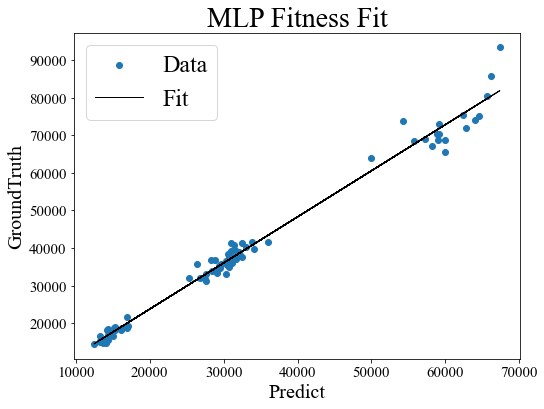

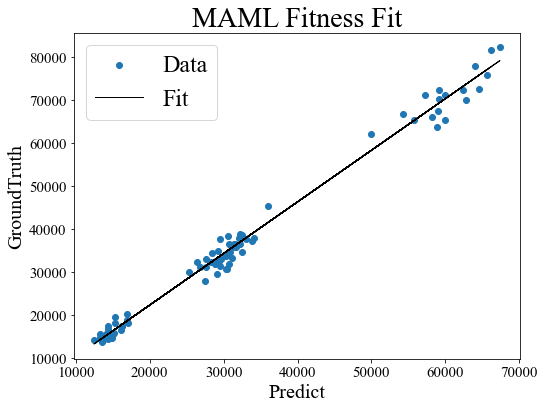

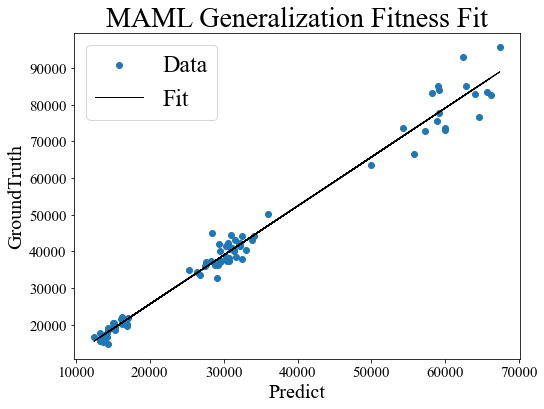

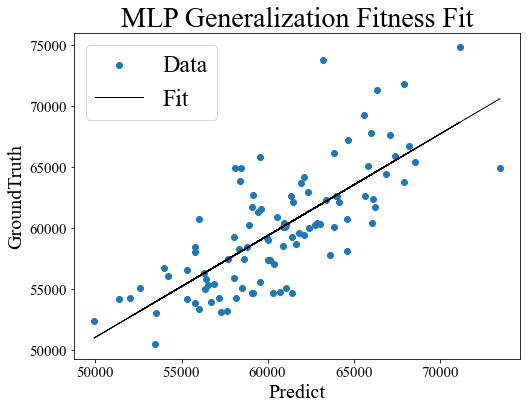

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
for i in range(len(data_list)):
    # 生成数据
    plt.figure(figsize=(8, 6))
    x = data_list[i]['Predict']
    y = data_list[i]['GroundTruth']
    # 回归分析
    coef = np.polyfit(x, y, 1)
    fit_fn = np.poly1d(coef)
    y_fit = fit_fn(x)
    # 绘图
    plt.scatter(x, y, label='Data')
    plt.plot(x, y_fit, 'black',lw=1, label='Fit')
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('Predict',fontsize=20)
    plt.ylabel('GroundTruth',fontsize=20)
    plt.title(f'{label[i]} Fitness Fit',size=28)
    plt.legend(fontsize=24)
    plt.show()

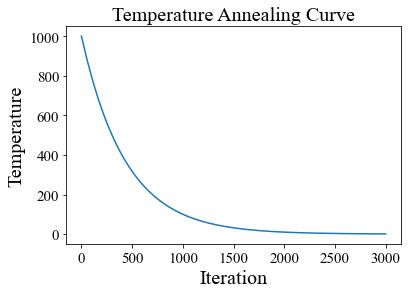

In [6]:
def temperature_plot():
    # 参数设置
    initial_temperature=1000
    cooling_rate=0.001
    iterations=3000
    final_temperature=0.01

    # 初始化温度
    temperature = initial_temperature
    temperature_list = [temperature]  # 记录温度变化

    # 迭代退火过程
    for i in range(iterations):
        # 降温
        temperature = initial_temperature * (cooling_rate ** (i / iterations))
        temperature_list.append(temperature)  # 记录温度变化
        if temperature < final_temperature:
            break

    # 可视化降温曲线
    plt.plot(range(iterations+1), temperature_list)
    plt.title('Temperature Annealing Curve',size=20)
    plt.xlabel('Iteration',fontsize=20)
    plt.ylabel('Temperature',fontsize=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()
temperature_plot()